In [1]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
print('sklearn: {}'.format(sklearn.__version__))

sklearn: 0.19.2


In [3]:
data = pd.read_csv("50_Startups.csv")

In [4]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([3, 5])) + 23
reg = LinearRegression().fit(X, y)

In [5]:
reg.coef_

array([3., 5.])

In [6]:
reg.intercept_ 

23.000000000000004

In [7]:
reg.predict(np.array([[3, 5]]))

array([57.])

In [8]:
lm_dataset=data[['R&D Spend','Profit']]

/Users/sandeep/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


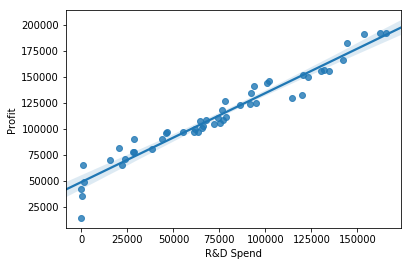

In [9]:
sb.regplot('R&D Spend', 'Profit', data = lm_dataset)

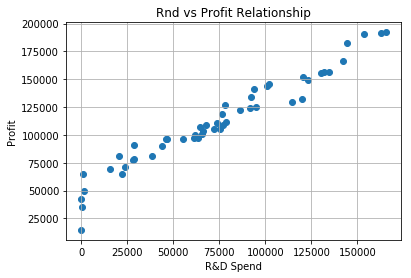

In [10]:
x=lm_dataset['R&D Spend']
y=lm_dataset['Profit']

x = np.reshape(np.array(x),newshape=(-1,1))
y = np.reshape(np.array(y),newshape=(-1,1))
plt.scatter(x,y)
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('Rnd vs Profit Relationship')

# for a,b in zip(x, y):
#     plt.text(a, b, str(b))

plt.grid(True)
plt.show()


In [30]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
from sklearn.model_selection import GridSearchCV
param_grid = [
        {'n_estimators': [3, 10, 30,300,500], 
}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(x, y)



/Users/sandeep/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sandeep/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sandeep/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/sandeep/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:458: Dat

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30, 300, 500]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [12]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_reg = GradientBoostingRegressor()
from sklearn.model_selection import GridSearchCV
param_grid = [
        {'n_estimators': [3, 10, 30,300,500], 
}
]
#forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(gbm_reg, param_grid, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(x, y)




/Users/sandeep/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sandeep/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sandeep/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sandeep/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30, 300, 500]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [13]:
grid_search.best_params_

{'n_estimators': 300}

In [ ]:
from sklearn.externals import joblib
joblib.dump(my_model, "my_model.pkl")
# and later...
my_model_loaded = joblib.load("my_model.pkl")    

In [17]:
reg = LinearRegression().fit(x, y)

In [15]:
# Make predictions using the testing set
y_pred = grid_search.predict(x)

In [16]:
# The coefficients
print('Coefficients: \n', reg.coef_)


Coefficients: 
 [3. 5.]


In [17]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y, y_pred))



Mean squared error: 7778950.93
Variance score: 1.00


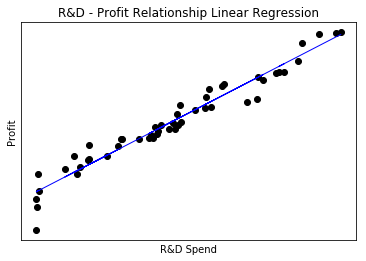

In [89]:
# Plot outputs
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=1,)

plt.xticks(())
plt.yticks(())

plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("R&D - Profit Relationship Linear Regression")
plt.grid(True)
plt.show()

## K Means Clustering


In [91]:
from sklearn.cluster import KMeans

In [94]:
age = [12,15,18,25,26,26,25,42,43,40,42,70,65,73,72]
age = np.reshape(age,newshape=(-1,1))

In [96]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(age)

In [97]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0], dtype=int32)

In [99]:
test_age=72
test_age=np.reshape(test_age,newshape=(-1,1))
kmeans.predict(test_age)

array([0], dtype=int32)

In [100]:
kmeans.cluster_centers_

array([[70.  ],
       [21.  ],
       [41.75]])

(array([3., 0., 4., 0., 3., 1., 0., 0., 1., 3.]),
 array([12. , 18.1, 24.2, 30.3, 36.4, 42.5, 48.6, 54.7, 60.8, 66.9, 73. ]),
 <a list of 10 Patch objects>)

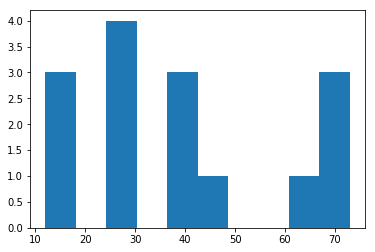

In [103]:
plt.hist(age)

/Users/sandeep/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


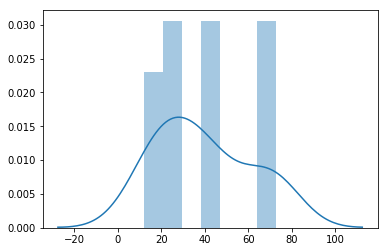

In [107]:
sb.distplot(age,bins=7)